<a href="https://colab.research.google.com/github/Rishikesh23a/-heart-Disease-Prediction-from-Medical-Data/blob/main/Predict_heart_disease_based_on_patient_health_attributes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Upload Dataset to Colab

In [ ]:
# @title Default title text
from google.colab import files
uploaded = files.upload()


Saving heart (2).csv to heart (2).csv


 Step 2: Load Dataset

In [ ]:
import pandas as pd

df = pd.read_csv("heart (2).csv")
print("Shape:", df.shape)
df.head()



Shape: (1025, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Step 3: Clean Data

In [ ]:
print(df.info())             # Check for nulls & types
print(df.isnull().sum())     # Null value count
df.dropna(inplace=True)      # Drop or impute missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


Step 4: Define Target & Features

In [ ]:
X = df.drop("target", axis=1)
y = df["target"]


Step 5: Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Step 6: Train Models

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
pred_log = logreg.predict(X_test)
print("Logistic Regression:\n", classification_report(y_test, pred_log))



Logistic Regression:
               precision    recall  f1-score   support

           0       0.89      0.70      0.78       100
           1       0.76      0.91      0.83       105

    accuracy                           0.81       205
   macro avg       0.82      0.81      0.81       205
weighted avg       0.82      0.81      0.81       205



Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)
print("Random Forest:\n", classification_report(y_test, pred_rf))


Random Forest:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



XGBoost

In [ ]:
!pip install xgboost
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
pred_xgb = xgb.predict(X_test)
print("XGBoost:\n", classification_report(y_test, pred_xgb))


XGBoost:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:52:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


SVM

In [ ]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)
pred_svm = svm.predict(X_test)
print("SVM:\n", classification_report(y_test, pred_svm))


SVM:
               precision    recall  f1-score   support

           0       0.94      0.91      0.92       100
           1       0.92      0.94      0.93       105

    accuracy                           0.93       205
   macro avg       0.93      0.93      0.93       205
weighted avg       0.93      0.93      0.93       205



Step 7: Confusion Matrix

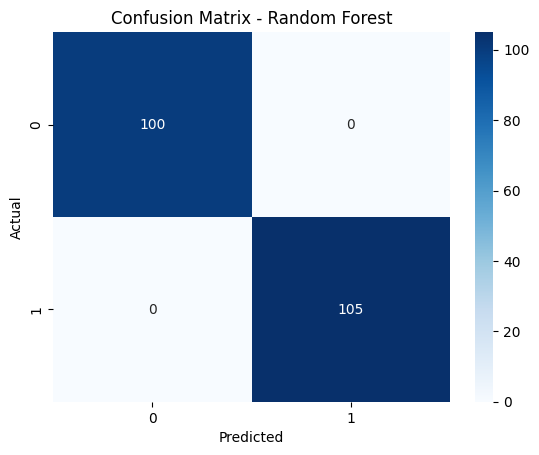

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Feature Importance

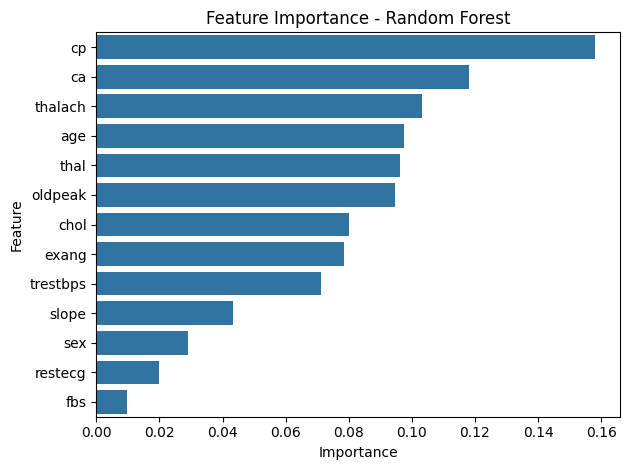

In [ ]:
importances = rf.feature_importances_
features = X.columns
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=feat_df)
plt.title("Feature Importance - Random Forest")
plt.tight_layout()
plt.show()


ROC-AUC Curve

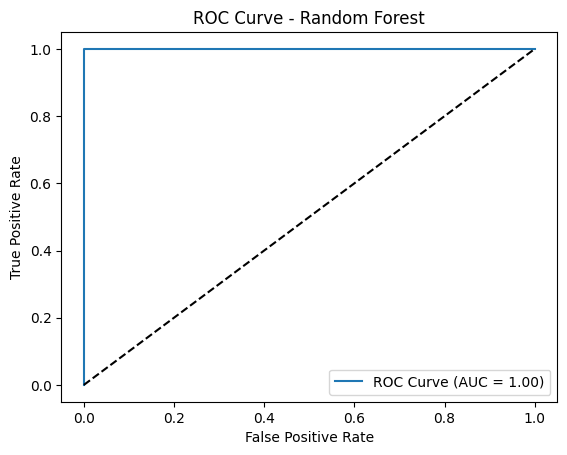

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

y_proba = rf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.show()


 Model Accuracy Table


📊 Model Performance Summary:

                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.809756   0.761905  0.914286  0.831169
1        Random Forest  1.000000   1.000000  1.000000  1.000000
2              XGBoost  1.000000   1.000000  1.000000  1.000000
3                  SVM  0.926829   0.916667  0.942857  0.929577


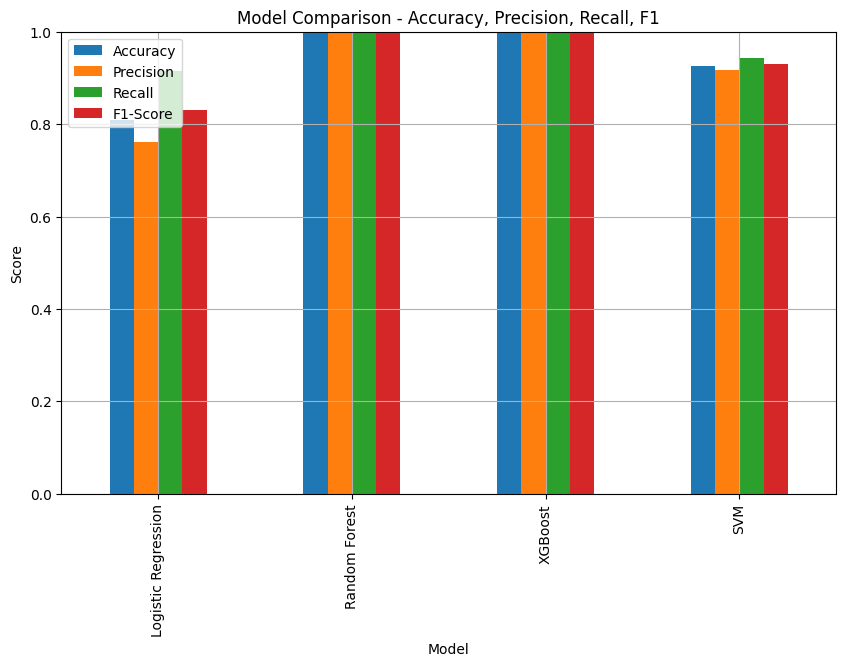

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create a function to get metrics
def get_metrics(y_true, y_pred, model_name):
    return {
        'Model': model_name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1-Score': f1_score(y_true, y_pred)
    }

# Collect metrics for each model
metrics = []
metrics.append(get_metrics(y_test, pred_log, 'Logistic Regression'))
metrics.append(get_metrics(y_test, pred_rf, 'Random Forest'))
metrics.append(get_metrics(y_test, pred_xgb, 'XGBoost'))
metrics.append(get_metrics(y_test, pred_svm, 'SVM'))

# Display as table
metrics_df = pd.DataFrame(metrics)
print("\n📊 Model Performance Summary:\n")
print(metrics_df)

# Optional: Plot it as a bar chart
metrics_df.set_index('Model').plot(kind='bar', figsize=(10,6))
plt.title("Model Comparison - Accuracy, Precision, Recall, F1")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.grid(True)
plt.show()
